<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Nastya/lenet/ReschParamOfOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model



<table>
  <tr>
    <th>layer</th>
    <th>layer type2</th>
    <th>feature maps</th>
    <th>size</th>
    <th>kernel size</th>
    <th>stride</th>
    <th>padding</th>
    <th>activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
  <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>2</th>
    <th>convoluation</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>6</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>4</th>
    <th>convoluation</th>
    <th>6</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>5</th>
    <th>maximum pooling</th>
    <th>6</th>
    <th>14*14</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>6</th>
    <th>convoluation</th>
    <th>12</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>7</th>
    <th>convoluation</th>
    <th>12</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>8</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>9</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>10</th>
    <th>maximum pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>11</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>12</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>35</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

# Hyperparameters

train dataset: MNIST + EMNIST letters

test dataset: dataset of DreamTeam

training sample size: 36960 * 2

validation sample size: 30800

testing sample size: 16784

loss finction: Cross Entropy Loss

optimizer: AdaBound



batch size: 2640


#Module importation

In [4]:
import torch
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as bar
import pickle
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go
!pip install torch_optimizer
import torch_optimizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.6 MB/s eta 0:00:00


#Git cloning

In [2]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36578, done.
remote: Counting objects: 100% (12938/12938), done.
remote: Compressing objects: 100% (12768/12768), done.
remote: Total 36578 (delta 242), reused 12806 (delta 159), pack-reused 23640
Receiving objects: 100% (36578/36578), 130.95 MiB | 15.48 MiB/s, done.
Resolving deltas: 100% (527/527), done.


#Dataset preparation

In [3]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

100%|██████████| 561753746/561753746 [00:07<00:00, 76526405.33it/s] 


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


In [4]:
class Lenet1(torch.nn.Module):
  def __init__(self, dp_rate):
    super(Lenet1, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
    self.bn1 = torch.nn.BatchNorm2d(4)
    self.act1 = torch.nn.ReLU6()
    self.dropout1 = torch.nn.Dropout(p=dp_rate)
    self.conv2 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.bn2 = torch.nn.BatchNorm2d(4)
    self.act2 = torch.nn.ReLU6()
    self.dropout2 = torch.nn.Dropout(p=dp_rate)
    self.conv3 = torch.nn.Conv2d(in_channels=4, out_channels=6, kernel_size=3, padding=1)
    self.bn3 = torch.nn.BatchNorm2d(6)
    self.act3 = torch.nn.ReLU6()
    self.dropout3 = torch.nn.Dropout(p=dp_rate)
    self.conv4 = torch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=1)
    self.bn4 = torch.nn.BatchNorm2d(6)
    self.act4 = torch.nn.ReLU6()
    self.dropout4 = torch.nn.Dropout(p=dp_rate)
    self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU6()
    self.conv5 = torch.nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=0)
    self.bn5 = torch.nn.BatchNorm2d(12)
    self.act6 = torch.nn.ReLU6()
    self.dropout5 = torch.nn.Dropout(p=dp_rate)
    self.conv6 = torch.nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=1)
    self.bn6 = torch.nn.BatchNorm2d(12)
    self.act7 = torch.nn.ReLU6()
    self.dropout6 = torch.nn.Dropout(p=dp_rate)
    self.conv7 = torch.nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, padding=0)
    self.bn7 = torch.nn.BatchNorm2d(16)
    self.act8 = torch.nn.ReLU6()
    self.dropout7 = torch.nn.Dropout(p=dp_rate)
    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.bn8 = torch.nn.BatchNorm2d(16)
    self.act9 = torch.nn.ReLU6()
    self.dropout8 = torch.nn.Dropout(p=dp_rate)
    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU6()
    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU6()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU6()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.act1(x)
    x = self.dropout1(x)
    skipConn1 = x

    x = self.conv2(x)
    x = self.bn2(x)
    x = self.act2(x)
    x = self.dropout2(x)
    x = torch.add(skipConn1, x)

    x = self.conv3(x)
    x = self.bn3(x)
    x = self.act3(x)
    x = self.dropout3(x)
    skipConn2 = x

    x = self.conv4(x)
    x = self.bn4(x)
    x = self.act4(x)
    x = self.dropout4(x)
    x = torch.add(skipConn2, x)

    x = self.pool1(x)
    x = self.act5(x)

    x = self.conv5(x)
    x = self.bn5(x)
    x = self.act6(x)
    x = self.dropout5(x)
    skipConn3 = x

    x = self.conv6(x)
    x = self.bn6(x)
    x = self.act7(x)
    x = self.dropout6(x)
    x = torch.add(x, skipConn3)

    x = self.conv7(x)
    x = self.bn7(x)
    x = self.act8(x)
    x = self.dropout7(x)
    skipConn4 = x

    x = self.conv8(x)
    x = self.bn8(x)
    x = self.act9(x)
    x = self.dropout8(x)
    x = torch.add(skipConn4, x)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

#AdaBound Resch of lr

##lr = 0.005(80 epoch)

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.005)
test_accuracy_history = []

for epoch in bar(range(150), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-5-db99261c6b30>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(150), desc = 'learning'):


learning:   0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model lr = 0.005", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#80

##lr = 0.001(120 epoch)

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001)
test_accuracy_history = []

for epoch in bar(range(150), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-9-26183d56bb26>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model lr = 0.001", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#120

##lr = 0.0005

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.0005)
test_accuracy_history = []

for epoch in bar(range(150), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-11-6f35dff95bd4>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model lr = 0.0005", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#показатели хуже, не обучаем

#learning of lr

In [ ]:
llr = [0.005, 0.001]
epoches = [80, 120]
for net in bar(range(2), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=llr[net])
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)

<ipython-input-13-2c8043ea3cae>:3: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



net:   0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-13-2c8043ea3cae>:5: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-13-2c8043ea3cae>:14: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7890)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7591)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7673)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7486)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7512)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7741)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7682)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7588)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7878)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7765)
accuracy
tensor(0.7890) tensor(0.7591) tensor(0.7673) tensor(0.7486) tensor(0.7512) tensor(0.7741) tensor(0.7682) tensor(0.7588) tensor(0.7878) tensor(0.7765)


sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7792)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7768)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7963)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7610)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7812)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7832)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7817)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7562)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7647)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7819)
accuracy
tensor(0.7792) tensor(0.7768) tensor(0.7963) tensor(0.7610) tensor(0.7812) tensor(0.7832) tensor(0.7817) tensor(0.7562) tensor(0.7647) tensor(0.7819)


In [ ]:
sample1 = "tensor(0.7602) tensor(0.7508) tensor(0.7689) tensor(0.7747) tensor(0.7733) tensor(0.7637) tensor(0.7721) tensor(0.7762) tensor(0.7866) tensor(0.7813) tensor(0.7933) tensor(0.7727) tensor(0.7592) tensor(0.7855) tensor(0.7660) tensor(0.7585) tensor(0.7634) tensor(0.7660) tensor(0.7815) tensor(0.7842)"
sample2 = "tensor(0.7658) tensor(0.7558) tensor(0.7699) tensor(0.7610) tensor(0.7624) tensor(0.7795) tensor(0.7716) tensor(0.7609) tensor(0.7902) tensor(0.7777) tensor(0.7872) tensor(0.7757) tensor(0.7979) tensor(0.7648) tensor(0.7897) tensor(0.7657) tensor(0.7831) tensor(0.7657) tensor(0.7521) tensor(0.7639)"

In [ ]:
samples = [sample1, sample2]
for i in range(len(samples)):
  samples[i] = samples[i].replace("tensor(", '')
  samples[i] = samples[i].replace(')', '')
  samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x7884c696d600>,
 'caps': [<matplotlib.lines.Line2D at 0x7884c696db40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7884c696d360>,
 'medians': [<matplotlib.lines.Line2D at 0x7884c696e080>,
 'fliers': [<matplotlib.lines.Line2D at 0x7884c696e200>,
 'means': []}

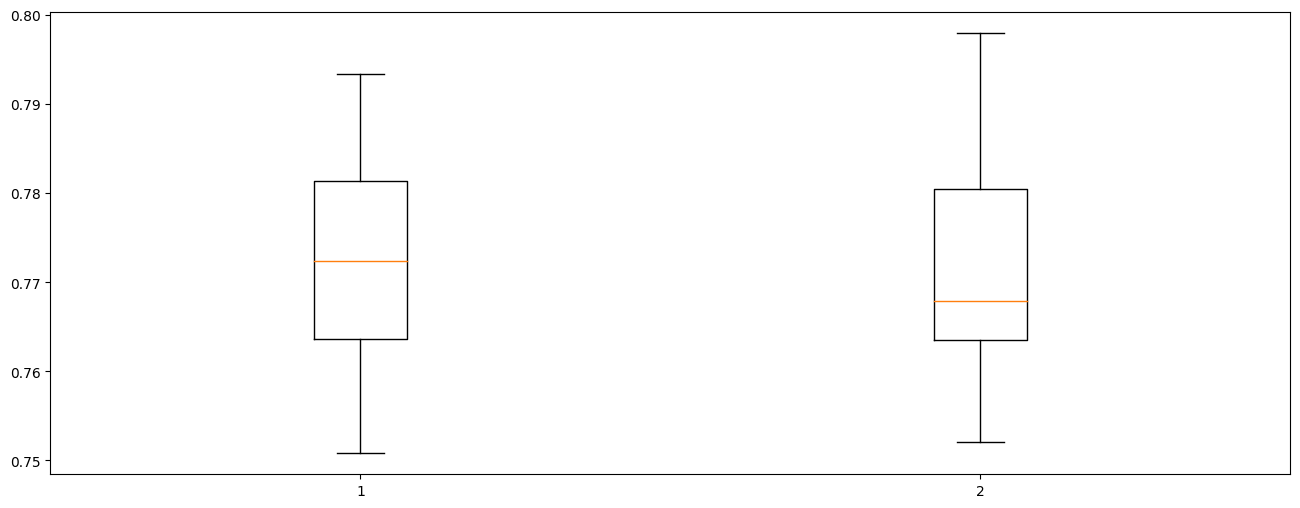

In [ ]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [ ]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val

0.9736417640719365

lr = 1e - 3, 120 epoch

# AdaBound Resch of betas

##betas = (0.9, 0.999)

In [ ]:
sample1 = "tensor(0.7658) tensor(0.7558) tensor(0.7699) tensor(0.7610) tensor(0.7624) tensor(0.7795) tensor(0.7716) tensor(0.7609) tensor(0.7902) tensor(0.7777) tensor(0.7872) tensor(0.7757) tensor(0.7979) tensor(0.7648) tensor(0.7897) tensor(0.7657) tensor(0.7831) tensor(0.7657) tensor(0.7521) tensor(0.7639)"

## betas = (0.95, 0.99)(100 epoch)

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, betas = (0.95, 0.99))
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-10-4339bd326b7c>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(120), desc = 'learning'):


learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model betas", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#100

## betas = (0.8, 0.9)(80epoch)

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, betas = (0.8, 0.9))
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-13-84c9f6c1ab7f>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model betas = (0.8, 0.9)", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#80

# learning of betas

In [ ]:
bet = [(0.95, 0.99), (0.8, 0.9)]
epoches = [100, 80]
for net in bar(range(2), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr= 0.001, betas = bet[net])
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)

<ipython-input-15-4d60d21d61f0>:3: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



net:   0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-15-4d60d21d61f0>:5: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-15-4d60d21d61f0>:14: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7617)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7788)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7738)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7736)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7596)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7548)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7861)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7627)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7788)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7758)
accuracy
tensor(0.7617) tensor(0.7788) tensor(0.7738) tensor(0.7736) tensor(0.7596) tensor(0.7548) tensor(0.7861) tensor(0.7627) tensor(0.7788) tensor(0.7758)


sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7738)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7798)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7511)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7657)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7823)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7613)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7326)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7393)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7733)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7734)
accuracy
tensor(0.7738) tensor(0.7798) tensor(0.7511) tensor(0.7657) tensor(0.7823) tensor(0.7613) tensor(0.7326) tensor(0.7393) tensor(0.7733) tensor(0.7734)


In [ ]:
sample1 = "tensor(0.7792) tensor(0.7768) tensor(0.7963) tensor(0.7610) tensor(0.7812) tensor(0.7832) tensor(0.7817) tensor(0.7562) tensor(0.7647) tensor(0.7819)"
sample2 = "tensor(0.7617) tensor(0.7788) tensor(0.7738) tensor(0.7736) tensor(0.7596) tensor(0.7548) tensor(0.7861) tensor(0.7627) tensor(0.7788) tensor(0.7758)"
sample3 = "tensor(0.7738) tensor(0.7798) tensor(0.7511) tensor(0.7657) tensor(0.7823) tensor(0.7613) tensor(0.7326) tensor(0.7393) tensor(0.7733) tensor(0.7734)"

In [ ]:
samples = [sample1, sample2, sample3]
for i in range(len(samples)):
  samples[i] = samples[i].replace("tensor(", '')
  samples[i] = samples[i].replace(')', '')
  samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x788456ea59f0>,
 'caps': [<matplotlib.lines.Line2D at 0x788456ea54b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x788456ea5c90>,
 'medians': [<matplotlib.lines.Line2D at 0x788456ea4f70>,
 'fliers': [<matplotlib.lines.Line2D at 0x788456ea4cd0>,
 'means': []}

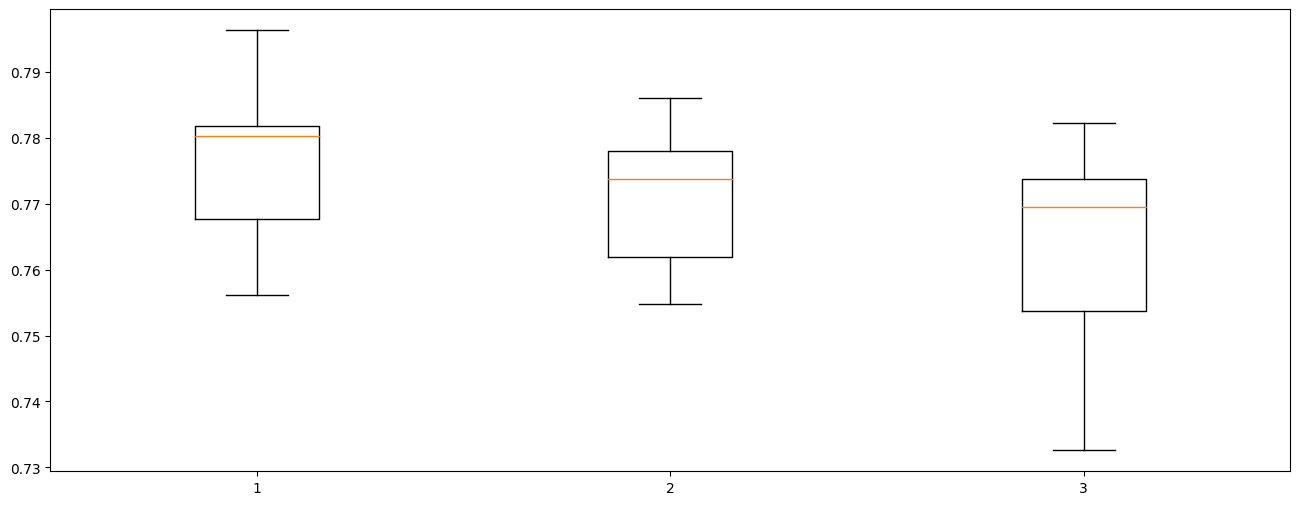

In [ ]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [ ]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val

0.2729651338545018

In [ ]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[2])
p_val

0.2600296105802893

In [ ]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[2])
p_val

0.06569576146084226

the best net with betas = (0.9, 0.999)

#AdaBound Resch of final lr(the best 0.1)

## final lr = 0.5(70 epoch)

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, final_lr = 0.5)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-23-c22e9c8864f0>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model final lr", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#70

##final_lr = 0.1(100 epoch) pass

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, final_lr = 0.1)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-25-52bba67c0480>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model final lr", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#100

##final_lr = 0.05(120 epoch)

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, final_lr = 0.05)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-27-f9c1b34b294d>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model final lr", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#120

##final_lr = 0.01 pass

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, final_lr = 0.01)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-29-300beef25fe1>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model final lr", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

##final_lr = 0.005 pass

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, final_lr = 0.005)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-31-d58c1852a2ba>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model final lr", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

#learning of final lr

In [ ]:
fl_lr = [0.5, 0.05]
epoches = [70, 120]
for net in bar(range(2), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr= 0.001, final_lr = fl_lr[net])
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)

<ipython-input-33-8be255a47f4a>:3: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



net:   0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-33-8be255a47f4a>:5: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-33-8be255a47f4a>:14: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/70 [00:00<?, ?it/s]

tensor(0.7607)


  0%|          | 0/70 [00:00<?, ?it/s]

tensor(0.7867)


  0%|          | 0/70 [00:00<?, ?it/s]

tensor(0.7838)


  0%|          | 0/70 [00:00<?, ?it/s]

tensor(0.7686)


  0%|          | 0/70 [00:00<?, ?it/s]

tensor(0.7623)


  0%|          | 0/70 [00:00<?, ?it/s]

tensor(0.7859)


  0%|          | 0/70 [00:00<?, ?it/s]

tensor(0.7481)


  0%|          | 0/70 [00:00<?, ?it/s]

tensor(0.7780)


  0%|          | 0/70 [00:00<?, ?it/s]

tensor(0.7783)


  0%|          | 0/70 [00:00<?, ?it/s]

tensor(0.7707)
accuracy
tensor(0.7607) tensor(0.7867) tensor(0.7838) tensor(0.7686) tensor(0.7623) tensor(0.7859) tensor(0.7481) tensor(0.7780) tensor(0.7783) tensor(0.7707)


sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7755)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7716)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7632)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7702)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7693)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7505)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7712)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7674)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7574)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7786)
accuracy
tensor(0.7755) tensor(0.7716) tensor(0.7632) tensor(0.7702) tensor(0.7693) tensor(0.7505) tensor(0.7712) tensor(0.7674) tensor(0.7574) tensor(0.7786)


In [ ]:
sample1 = "tensor(0.7792) tensor(0.7768) tensor(0.7963) tensor(0.7610) tensor(0.7812) tensor(0.7832) tensor(0.7817) tensor(0.7562) tensor(0.7647) tensor(0.7819)"
sample2 = "tensor(0.7607) tensor(0.7867) tensor(0.7838) tensor(0.7686) tensor(0.7623) tensor(0.7859) tensor(0.7481) tensor(0.7780) tensor(0.7783) tensor(0.7707)"
sample3 = "tensor(0.7755) tensor(0.7716) tensor(0.7632) tensor(0.7702) tensor(0.7693) tensor(0.7505) tensor(0.7712) tensor(0.7674) tensor(0.7574) tensor(0.7786)"

In [ ]:
samples = [sample1, sample2, sample3]
for i in range(len(samples)):
  samples[i] = samples[i].replace("tensor(", '')
  samples[i] = samples[i].replace(')', '')
  samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x788456a69270>,
 'caps': [<matplotlib.lines.Line2D at 0x788456a697b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x788456a68fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x788456a69cf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x788456a69f90>,
 'means': []}

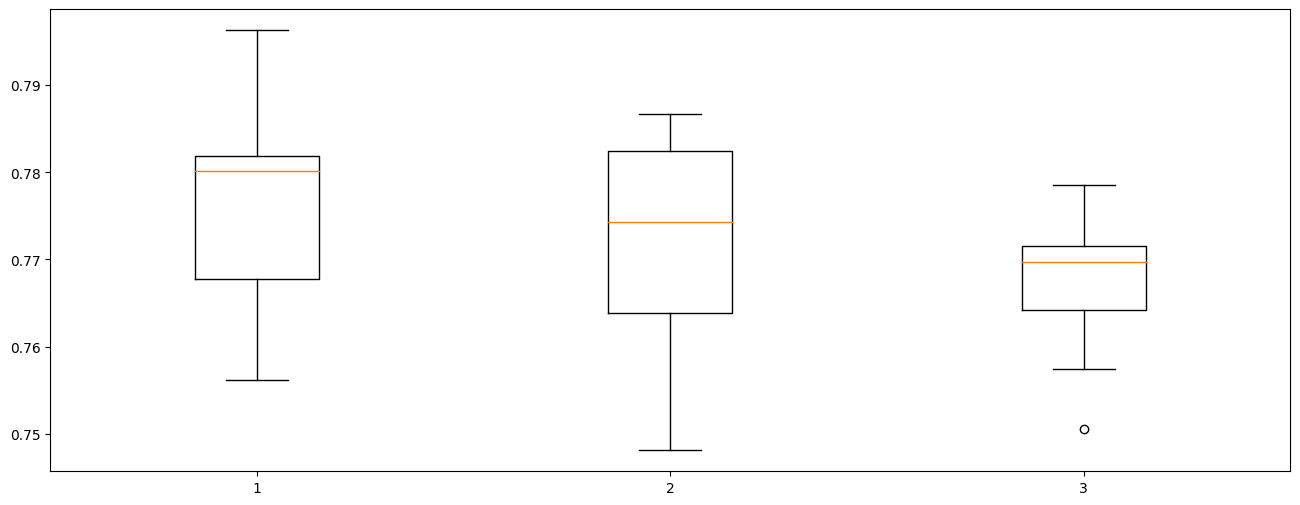

In [ ]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

#AdaBound Resch of gamma(the best 1e-5)


##gamma = 1e - 2(120 epoch)

In [5]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma = 1e-2)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-5-7774dd15432f>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(120), desc = 'learning'):


learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [6]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(120)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model gamma", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#120

##gamma = 1e-3 pass

In [ ]:
sample1 = "tensor(0.7792) tensor(0.7768) tensor(0.7963) tensor(0.7610) tensor(0.7812) tensor(0.7832) tensor(0.7817) tensor(0.7562) tensor(0.7647) tensor(0.7819)"

##gamma = 1e-4(110 epoch)

In [7]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-4)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-7-8c8808847089>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [8]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model gamma", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#110

##gamma = 1e-5(80 epoch)

In [9]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-9-532f123e3d35>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [10]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model gamma", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#80

#learning of gamma

In [11]:
gm = [1e-2, 1e-4, 1e-5]
epoches = [120, 110, 80]
for net in bar(range(2), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr= 0.001, gamma = gm[net])
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)

<ipython-input-11-1712c56233be>:3: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



net:   0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-11-1712c56233be>:5: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-11-1712c56233be>:14: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7556)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7604)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7646)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7542)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7442)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7501)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7626)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7382)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7745)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7623)
accuracy
tensor(0.7556) tensor(0.7604) tensor(0.7646) tensor(0.7542) tensor(0.7442) tensor(0.7501) tensor(0.7626) tensor(0.7382) tensor(0.7745) tensor(0.7623)


sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

tensor(0.7696)


  0%|          | 0/110 [00:00<?, ?it/s]

tensor(0.7599)


  0%|          | 0/110 [00:00<?, ?it/s]

tensor(0.7788)


  0%|          | 0/110 [00:00<?, ?it/s]

tensor(0.7736)


  0%|          | 0/110 [00:00<?, ?it/s]

tensor(0.7906)


  0%|          | 0/110 [00:00<?, ?it/s]

tensor(0.7822)


  0%|          | 0/110 [00:00<?, ?it/s]

tensor(0.7718)


  0%|          | 0/110 [00:00<?, ?it/s]

tensor(0.7927)


  0%|          | 0/110 [00:00<?, ?it/s]

tensor(0.7852)


  0%|          | 0/110 [00:00<?, ?it/s]

tensor(0.7736)
accuracy
tensor(0.7696) tensor(0.7599) tensor(0.7788) tensor(0.7736) tensor(0.7906) tensor(0.7822) tensor(0.7718) tensor(0.7927) tensor(0.7852) tensor(0.7736)


In [12]:
gm = [1e-2, 1e-4, 1e-5]
epoches = [120, 110, 80]
for net in bar(range(2,3), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr= 0.001, gamma = gm[net])
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)

<ipython-input-12-eaebf8e68a57>:3: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



net:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-12-eaebf8e68a57>:5: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-12-eaebf8e68a57>:14: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7674)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7948)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7587)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7803)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7708)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7771)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7738)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7874)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7813)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7967)
accuracy
tensor(0.7674) tensor(0.7948) tensor(0.7587) tensor(0.7803) tensor(0.7708) tensor(0.7771) tensor(0.7738) tensor(0.7874) tensor(0.7813) tensor(0.7967)


In [13]:
sample1 = "tensor(0.7792) tensor(0.7768) tensor(0.7963) tensor(0.7610) tensor(0.7812) tensor(0.7832) tensor(0.7817) tensor(0.7562) tensor(0.7647) tensor(0.7819)"
sample2 = "tensor(0.7556) tensor(0.7604) tensor(0.7646) tensor(0.7542) tensor(0.7442) tensor(0.7501) tensor(0.7626) tensor(0.7382) tensor(0.7745) tensor(0.7623)"
sample3 = "tensor(0.7696) tensor(0.7599) tensor(0.7788) tensor(0.7736) tensor(0.7906) tensor(0.7822) tensor(0.7718) tensor(0.7927) tensor(0.7852) tensor(0.7736)"
sample4 = "tensor(0.7674) tensor(0.7948) tensor(0.7587) tensor(0.7803) tensor(0.7708) tensor(0.7771) tensor(0.7738) tensor(0.7874) tensor(0.7813) tensor(0.7967)"

In [16]:
samples = [sample1, sample2, sample3, sample4]
for i in range(len(samples)):
  samples[i] = samples[i].replace("tensor(", '')
  samples[i] = samples[i].replace(')', '')
  samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x7c909e5b6a40>,
 'caps': [<matplotlib.lines.Line2D at 0x7c909e5b6f80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c909e5b67a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c909e5b74c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c909e5b7760>,
 'means': []}

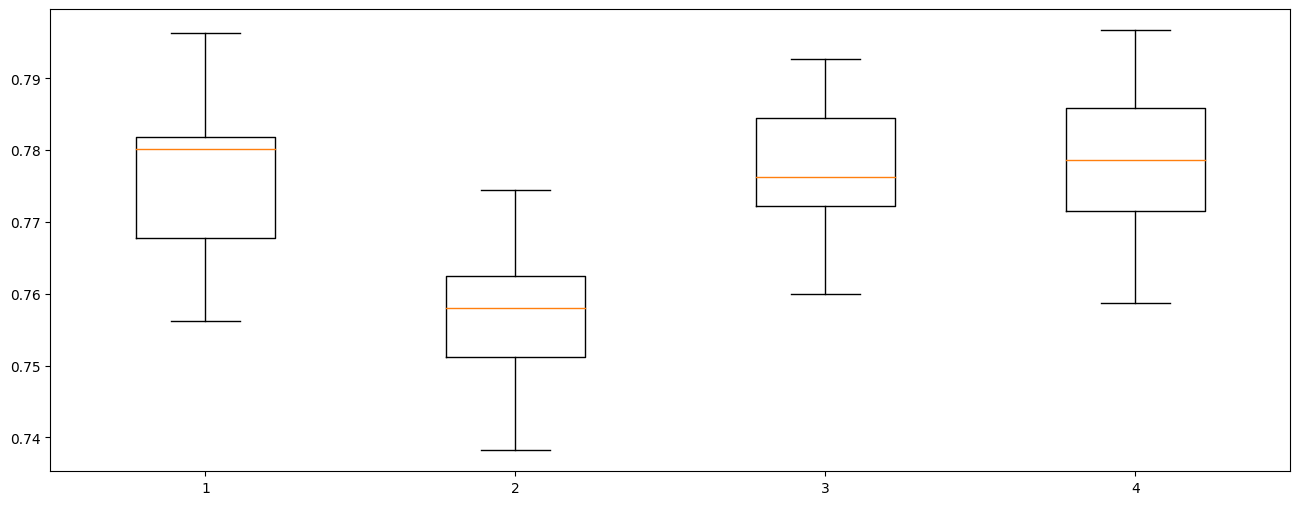

In [17]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [18]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[3])
p_val

0.6329894271148303

#AdaBound of epsilon(the best 1e-6)

##epsilon = 1e - 6(100 epoch)

In [20]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5,eps = 1e-6 )
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-20-1c79d02ad0df>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [21]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#100

##epsilon = 1e-7

In [22]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5,eps = 1e-7)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-22-2b059803fdf4>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [23]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#90

##epsilon = 1e-9

In [24]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5,eps = 1e-9)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-24-e07112657e8c>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [25]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#100

##epsilon = 1e-10(80 epoch)

In [26]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5,eps = 1e-10)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-26-ed1fcd0d0909>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [27]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#80

#learning of epsilon

In [29]:
epsilon= [1e-6, 1e-10]
epoches = [100, 80]
for net in bar(range(2), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr= 0.001, gamma = 1e-5, eps = epsilon[net])
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)

<ipython-input-29-c1c7319ab507>:3: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



net:   0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-29-c1c7319ab507>:5: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-29-c1c7319ab507>:14: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7766)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7821)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7976)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7989)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7863)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7729)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7855)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.8068)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7819)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7911)
accuracy
tensor(0.7766) tensor(0.7821) tensor(0.7976) tensor(0.7989) tensor(0.7863) tensor(0.7729) tensor(0.7855) tensor(0.8068) tensor(0.7819) tensor(0.7911)


sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7681)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7565)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7649)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7722)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7732)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7763)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7520)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7686)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7744)


  0%|          | 0/80 [00:00<?, ?it/s]

tensor(0.7755)
accuracy
tensor(0.7681) tensor(0.7565) tensor(0.7649) tensor(0.7722) tensor(0.7732) tensor(0.7763) tensor(0.7520) tensor(0.7686) tensor(0.7744) tensor(0.7755)


In [30]:
epsilon= [1e-6, 1e-10, 1e-7]
epoches = [100, 80, 90]
for net in bar(range(2,3), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr= 0.001, gamma = 1e-5, eps = epsilon[net])
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)

<ipython-input-30-867b5b3f52c0>:3: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



net:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-30-867b5b3f52c0>:5: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-30-867b5b3f52c0>:14: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7902)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7615)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7953)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7836)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7684)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7752)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7721)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7779)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7693)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7755)
accuracy
tensor(0.7902) tensor(0.7615) tensor(0.7953) tensor(0.7836) tensor(0.7684) tensor(0.7752) tensor(0.7721) tensor(0.7779) tensor(0.7693) tensor(0.7755)


In [31]:
sample6 = "tensor(0.7766) tensor(0.7821) tensor(0.7976) tensor(0.7989) tensor(0.7863) tensor(0.7729) tensor(0.7855) tensor(0.8068) tensor(0.7819) tensor(0.7911)"
sample7 = "tensor(0.7902) tensor(0.7615) tensor(0.7953) tensor(0.7836) tensor(0.7684) tensor(0.7752) tensor(0.7721) tensor(0.7779) tensor(0.7693) tensor(0.7755)"
sample8 = "tensor(0.7674) tensor(0.7948) tensor(0.7587) tensor(0.7803) tensor(0.7708) tensor(0.7771) tensor(0.7738) tensor(0.7874) tensor(0.7813) tensor(0.7967)"
sample10 = "tensor(0.7681) tensor(0.7565) tensor(0.7649) tensor(0.7722) tensor(0.7732) tensor(0.7763) tensor(0.7520) tensor(0.7686) tensor(0.7744) tensor(0.7755)"

In [32]:
samples = [sample6, sample7, sample8, sample10]
for i in range(len(samples)):
  samples[i] = samples[i].replace("tensor(", '')
  samples[i] = samples[i].replace(')', '')
  samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x7c909e1eace0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c909e1eb220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c909e1eaa40>,
 'medians': [<matplotlib.lines.Line2D at 0x7c909e1eb760>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c909e1eba00>,
 'means': []}

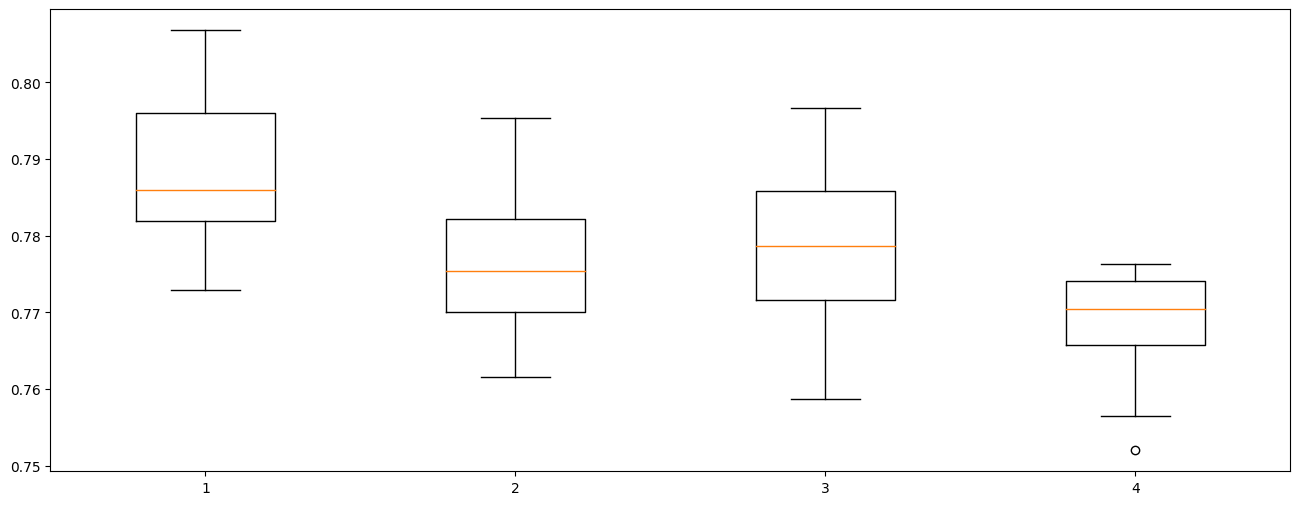

In [33]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

#AdaBound Resch of weight_decay(the best 0)

##weight_decay = 0

In [ ]:
sample1 = "tensor(0.7766) tensor(0.7821) tensor(0.7976) tensor(0.7989) tensor(0.7863) tensor(0.7729) tensor(0.7855) tensor(0.8068) tensor(0.7819) tensor(0.7911)"

##weight_decay = 1e-3(100 epoch)

In [34]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5,eps = 1e-6, weight_decay= 1e-3)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-34-f837012eb97c>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [35]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#80

##weight_decay = 1e-4

In [36]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5,eps = 1e-6, weight_decay= 1e-4)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-36-135b7b2ef5a8>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [37]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#80

##weight_decay = 1e-5(95 epoch)

In [38]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5,eps = 1e-6, weight_decay= 1e-5 )
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-38-b1f77bea4923>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [39]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#95

##weight_decay = 1e-8(90 epoch)

In [40]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5,eps = 1e-6, weight_decay= 1e-8)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-40-21cafb7da6b8>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [41]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#90

learning weight_decay

In [6]:
weight= [1e-3, 1e-5, 1e-8]
epoches = [100, 95, 90]
for net in bar(range(3), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr= 0.001, gamma = 1e-5, eps = 1e-6, weight_decay= weight[net])
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)

<ipython-input-6-441e3efb1886>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for net in bar(range(3), desc = "net", leave= False):


net:   0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-6-441e3efb1886>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):


sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-6-441e3efb1886>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(epoches[net]), leave=False):


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7878)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7908)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7954)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7962)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7872)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7777)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7789)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7781)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7952)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7728)
accuracy
tensor(0.7878) tensor(0.7908) tensor(0.7954) tensor(0.7962) tensor(0.7872) tensor(0.7777) tensor(0.7789) tensor(0.7781) tensor(0.7952) tensor(0.7728)


sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

tensor(0.7564)


  0%|          | 0/95 [00:00<?, ?it/s]

tensor(0.7561)


  0%|          | 0/95 [00:00<?, ?it/s]

tensor(0.7570)


  0%|          | 0/95 [00:00<?, ?it/s]

tensor(0.7777)


  0%|          | 0/95 [00:00<?, ?it/s]

tensor(0.7730)


  0%|          | 0/95 [00:00<?, ?it/s]

tensor(0.7756)


  0%|          | 0/95 [00:00<?, ?it/s]

tensor(0.7802)


  0%|          | 0/95 [00:00<?, ?it/s]

tensor(0.7756)


  0%|          | 0/95 [00:00<?, ?it/s]

tensor(0.7499)


  0%|          | 0/95 [00:00<?, ?it/s]

tensor(0.7827)
accuracy
tensor(0.7564) tensor(0.7561) tensor(0.7570) tensor(0.7777) tensor(0.7730) tensor(0.7756) tensor(0.7802) tensor(0.7756) tensor(0.7499) tensor(0.7827)


sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7662)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7838)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7768)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7693)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7685)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7526)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7860)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7841)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7661)


  0%|          | 0/90 [00:00<?, ?it/s]

tensor(0.7727)
accuracy
tensor(0.7662) tensor(0.7838) tensor(0.7768) tensor(0.7693) tensor(0.7685) tensor(0.7526) tensor(0.7860) tensor(0.7841) tensor(0.7661) tensor(0.7727)


#learning of weight_decay

In [7]:
sample1 = "tensor(0.7766) tensor(0.7821) tensor(0.7976) tensor(0.7989) tensor(0.7863) tensor(0.7729) tensor(0.7855) tensor(0.8068) tensor(0.7819) tensor(0.7911)"
sample3 = "tensor(0.7878) tensor(0.7908) tensor(0.7954) tensor(0.7962) tensor(0.7872) tensor(0.7777) tensor(0.7789) tensor(0.7781) tensor(0.7952) tensor(0.7728)"
sample5 = "tensor(0.7564) tensor(0.7561) tensor(0.7570) tensor(0.7777) tensor(0.7730) tensor(0.7756) tensor(0.7802) tensor(0.7756) tensor(0.7499) tensor(0.7827)"
sample8 = "tensor(0.7662) tensor(0.7838) tensor(0.7768) tensor(0.7693) tensor(0.7685) tensor(0.7526) tensor(0.7860) tensor(0.7841) tensor(0.7661) tensor(0.7727)"

In [9]:
samples = [sample1, sample3, sample5, sample8]
for i in range(len(samples)):
  samples[i] = samples[i].replace("tensor(", '')
  samples[i] = samples[i].replace(')', '')
  samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x7c0544395900>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0544395e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0544395780>,
 'medians': [<matplotlib.lines.Line2D at 0x7c0544396380>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c0544396620>,
 'means': []}

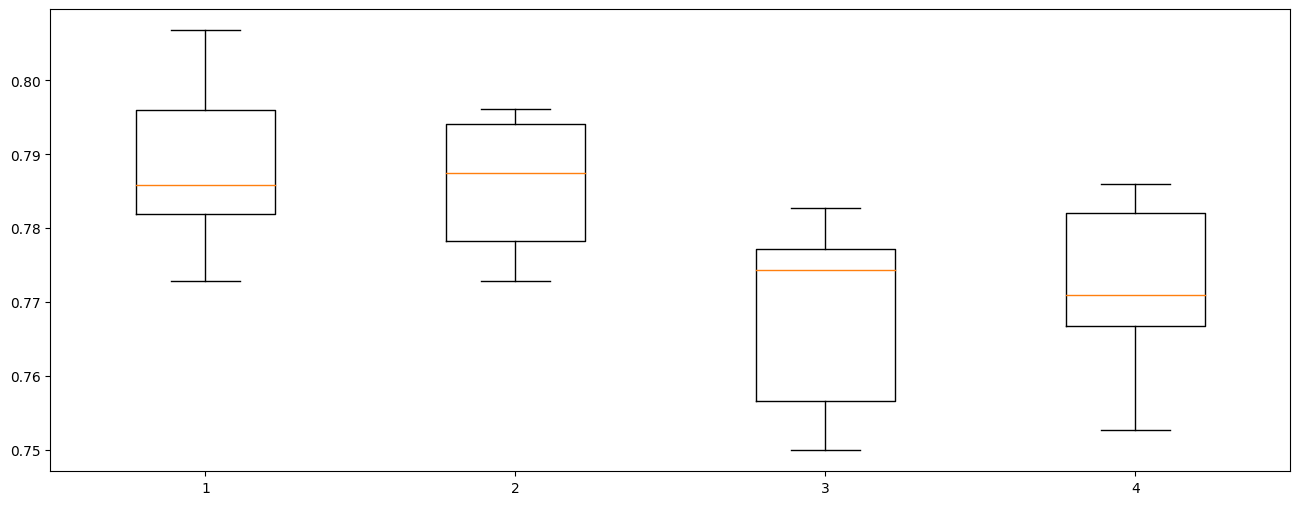

In [10]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [11]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val

0.6549132235426818

#AdaBound Resch of amsbound(the best True)

##amsbound = False(80 epoch)

In [12]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5,eps = 1e-6, amsbound= False)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-12-471a3cdb3687>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(120), desc = 'learning'):


learning:   0%|          | 0/120 [00:00<?, ?it/s]

In [13]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(150)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="AdaBound model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#80

#learning of amsbound

In [6]:
ams= [False]
epoches = [80]
for net in bar(range(1), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr= 0.001, gamma = 1e-5, eps = 1e-6, weight_decay= 0,amsbound=ams[net] )
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)

<ipython-input-6-24d073de2d89>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for net in bar(range(1), desc = "net", leave= False):


net:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-6-24d073de2d89>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(10), desc = 'sample exerimnet', leave = False):


sample exerimnet:   0%|          | 0/10 [00:00<?, ?it/s]

NameError: ignored

In [1]:
sample1 = "tensor(0.7766) tensor(0.7821) tensor(0.7976) tensor(0.7989) tensor(0.7863) tensor(0.7729) tensor(0.7855) tensor(0.8068) tensor(0.7819) tensor(0.7911)"
sample2 = "tensor(0.7813) tensor(0.7626) tensor(0.7956) tensor(0.7738) tensor(0.7664) tensor(0.7789) tensor(0.7785) tensor(0.7783) tensor(0.7601) tensor(0.7766)"

In [2]:
samples = [sample1, sample2]
for i in range(len(samples)):
  samples[i] = samples[i].replace("tensor(", '')
  samples[i] = samples[i].replace(')', '')
  samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x7afc946dacb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7afc946db8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7afc946d9570>,
 'medians': [<matplotlib.lines.Line2D at 0x7afc946d94b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7afc944d0220>,
 'means': []}

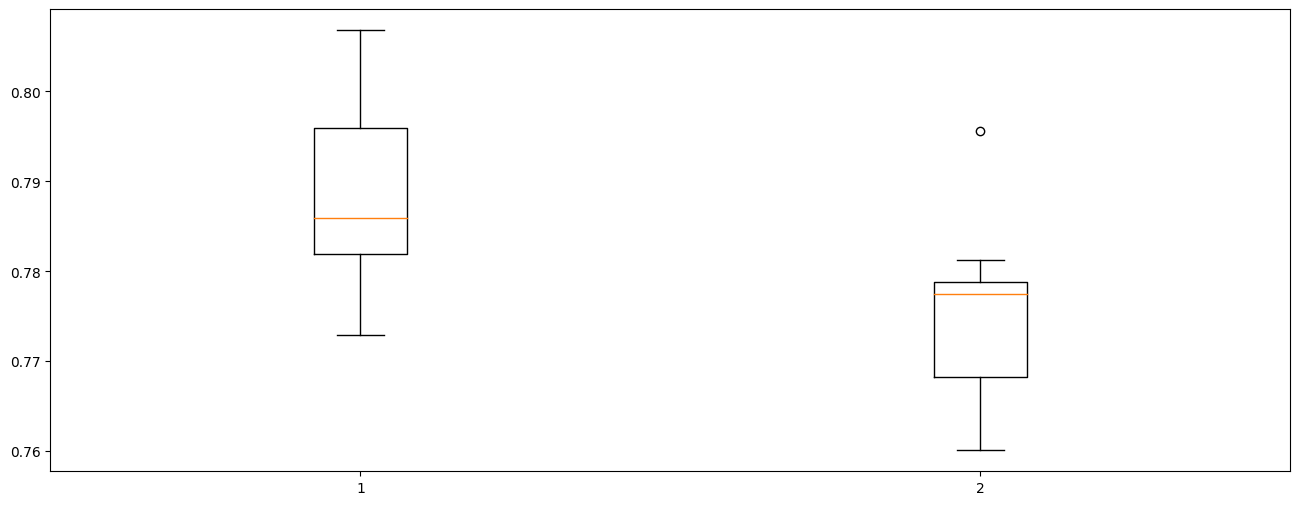

In [7]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

#Result THE BEST NET

In [ ]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch_optimizer.AdaBound(lenet.parameters(), lr=0.001, gamma= 1e-5,eps = 1e-6)
test_accuracy_history = []

for epoch in bar(range(120), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)